**1.1 Introduction to the Use case for Project A**

<div class="usecase-title">UC00126_Accessibility_Analysis</div>

<div class="usecase-authors"><b>Authored by: </b>Nelkin Eldho</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Machine learning</div>
</div>

**Objective:** The goal of this use case is to assess the accessibility of public infrastructure in Melbourne by analyzing datasets related to metro stations with accessibility, and tactile ground surface indicators. This study aims to provide transparency on existing facilities that support individuals with disabilities and impairments, helping decision-makers enhance accessibility infrastructure. By integrating multiple datasets, we will identify areas that may present challenges for people with mobility impairments and highlight regions where improvements could be made to foster inclusivity and equal access.

**Scenario:** Melbourne is a diverse and inclusive city committed to ensuring accessibility for all residents and visitors, including those with disabilities. However, challenges remain in making public spaces fully accessible.
In this scenario, we are taking on the role of a data analyst for an urban accessibility initiative led by the City of Melbourne. The objective is to analyze accessibility features by answering key questions:

How accessible are Melbourne’s footpaths?

Which metro stations provide adequate accessibility support?

Which areas have significant accessibility gaps? and much more. 

This analysis will provide crucial insights to urban planners, policymakers, and advocacy groups working to enhance Melbourne’s accessibility standards.

**What you will learn from this use case**

This Use case provides hands-on experience in analyzing accessibility-related data and deriving insights to support inclusive urban development. It will help uncover:

1. Geospatial Accessibility Insights – Identify areas in Melbourne that have strong accessibility infrastructure and those with gaps that require improvement.

2. Public Transportation Accessibility – Analyze metro stations to determine their accessibility features and how well they cater to individuals with disabilities.

3. Footpath & Walkability Analysis – Assess footpath steepness to identify locations that may present challenges for wheelchair users or individuals with mobility impairments.

4. Urban Planning & Policy Recommendations – Provide data-driven insights to help improve Melbourne’s accessibility, supporting policy development and infrastructure planning.

**Introduction: Enhancing Accessibility in Melbourne**

Ensuring that cities are inclusive and accessible to all individuals, including those with disabilities and impairments, is a key aspect of urban planning. Melbourne, known for its vibrant culture and infrastructure, has made significant strides in accessibility. However, challenges remain in ensuring that public spaces, transportation hubs, and pedestrian pathways are fully accessible to everyone.
This project aims to analyze accessibility across Melbourne by evaluating key datasets from the Melbourne Open Data portal:

Footpath Steepness – Identifies areas where steep inclines may pose challenges for individuals with mobility impairments.

Metro Train Stations with Accessibility Information – Provides details on accessibility features available at train stations.

By integrating these datasets, we can assess how well Melbourne supports individuals with accessibility needs, identify gaps in infrastructure, and provide actionable insights to urban planners and policymakers. The findings from this study will contribute to decision-making processes aimed at improving accessibility and promoting inclusivity across the city.

**Datasets:**

https://data.melbourne.vic.gov.au/explore/dataset/footpath-steepness/information/

https://data.melbourne.vic.gov.au/explore/dataset/metro-train-stations-with-accessibility-information/information/



**1.2 Loading Datasets using APIs**

In [10]:
import pandas as pd 
import requests
from io import StringIO
 
#API details for the first dataset
base_url_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_1 = 'footpath-steepness'
url_1 = f"{base_url_1}{dataset_id_1}/exports/csv"
 
#API details for the second dataset
base_url_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_2 = 'metro-train-stations-with-accessibility-information'
url_2 = f"{base_url_1}{dataset_id_2}/exports/csv"
 
 
#Fetching the first dataset for footpath steepness
response_1 = requests.get(url_1)
df_1 = pd.read_csv(StringIO(response_1.text), delimiter=';')
 
 
#Fetching the second dataset for metro stations accessibility information
response_2 = requests.get(url_2)
df_2 = pd.read_csv(StringIO(response_2.text), delimiter=';')
 
print("Column Names for first dataset")
print(df_1.columns.tolist())
 
print("Column Names for second dataset")
print(df_2.columns.tolist())

Column Names for first dataset
['geo_point_2d', 'geo_shape', 'grade1in', 'gradepc', 'segside', 'statusid', 'asset_type', 'deltaz', 'streetid', 'mccid_int', 'mcc_id', 'address', 'rlmax', 'rlmin', 'distance']
Column Names for second dataset
['geo_point_2d', 'geo_shape', 'he_loop', 'lift', 'pids', 'station']


Now we assign df_1 & df_2 to new variables df_footpath and df_metro, respectively which are easily readable for anyone 

In [11]:
df_footpath = df_1
df_metro = df_2

In [12]:
print("Display first 5 rows of Footpath steepness Dataset:")
print(df_footpath.head())

Display first 5 rows of Footpath steepness Dataset:
                              geo_point_2d  \
0  -37.823036142583945, 144.94866061456034   
1   -37.79542957518662, 144.91714933764632   
2    -37.79544286753349, 144.9172426574227   
3   -37.79580169415494, 144.92075182140118   
4   -37.79654832375531, 144.92328274904054   

                                           geo_shape  grade1in  gradepc  \
0  {"coordinates": [[[[144.94865791889143, -37.82...       4.2    23.81   
1  {"coordinates": [[[[144.9171360775573, -37.795...       NaN      NaN   
2  {"coordinates": [[[[144.917238930522, -37.7954...       NaN      NaN   
3  {"coordinates": [[[144.92074176246658, -37.795...      35.1     2.85   
4  {"coordinates": [[[[144.92328246984576, -37.79...     109.6     0.91   

  segside  statusid    asset_type  deltaz  streetid  mccid_int   mcc_id  \
0     NaN       8.0  Road Footway    6.77    3094.0    30821.0  1388075   
1     NaN       NaN  Road Footway     NaN       NaN        NaN  153462

In [13]:
print("Display first 5 rows of Metro train stations Dataset:")
print(df_metro.head())

Display first 5 rows of Metro train stations Dataset:
                              geo_point_2d  \
0           -37.77839599999999, 145.031251   
1           -37.86724899999996, 144.830604   
2  -37.761897999999974, 144.96056099999998   
3           -37.82241099999999, 145.045617   
4   -37.73345899999998, 144.96274700000004   

                                           geo_shape he_loop lift        pids  \
0  {"coordinates": [145.031251, -37.7783959999999...      No   No  Dot Matrix   
1  {"coordinates": [144.830604, -37.8672489999999...      No   No         LCD   
2  {"coordinates": [144.96056099999998, -37.76189...      No   No          No   
3  {"coordinates": [145.045617, -37.8224109999999...      No   No          No   
4  {"coordinates": [144.96274700000004, -37.73345...      No   No          No   

      station  
0  Alphington  
1      Altona  
2      Anstey  
3      Auburn  
4      Batman  


**1.3 Cleaning Dataset and Preprocessing**

Now we proceed with cleaning the dataset by initially searching for missing values.

In [14]:
# Checking for missing values
print("Missing values in first dataset:")
print(df_footpath.isnull().sum())

print("Missing values in second dataset:")
print(df_metro.isnull().sum())

# Handling duplicates (if any)
df_footpath = df_footpath.drop_duplicates()
df_metro = df_metro.drop_duplicates()

# Converting data types
# converting 'grade1in' to numeric if needed
df_footpath['grade1in'] = pd.to_numeric(df_footpath['grade1in'], errors='coerce')  # here errors='coerce' converts invalid values to NaN

# Removing irrelevant or unnecessary columns 
df_footpath = df_footpath.drop(columns=['mccid_int', 'mcc_id'])


# Standardizing column names
df_footpath.columns = df_footpath.columns.str.lower().str.replace(' ', '_')
df_metro.columns = df_metro.columns.str.lower().str.replace(' ', '_')

# removing extreme values in the 'deltaz' column:
df_footpath = df_footpath[df_footpath['deltaz'] < df_footpath['deltaz'].quantile(0.95)]  # Removes outliers above the 95th percentile



Missing values in first dataset:
geo_point_2d        0
geo_shape        1036
grade1in         7297
gradepc          4455
segside         23088
statusid        13151
asset_type          3
deltaz           4455
streetid        13151
mccid_int       13151
mcc_id              0
address         13155
rlmax            4455
rlmin            4455
distance         4455
dtype: int64
Missing values in second dataset:
geo_point_2d    0
geo_shape       0
he_loop         0
lift            0
pids            0
station         0
dtype: int64


Now we split latitude and longitude from 'geo_point_2d for better use of location coordinates for our analysis

In [15]:
df_footpath[['latitude', 'longitude']] = df_footpath['geo_point_2d'].str.split(',', expand=True)

# Converting the latitude and longitude to numeric values (float)
df_footpath['latitude'] = pd.to_numeric(df_footpath['latitude'], errors='coerce')
df_footpath['longitude'] = pd.to_numeric(df_footpath['longitude'], errors='coerce')

# dropping the 'geo_point_2d' column
df_footpath = df_footpath.drop(columns=['geo_point_2d'])

print(df_footpath[['latitude', 'longitude']].head())


    latitude   longitude
3 -37.795802  144.920752
4 -37.796548  144.923283
6 -37.823680  144.947352
7 -37.814174  144.943548
8 -37.814141  144.944347


In [16]:
# Handling missing values
# Imputing numerical columns with the median
numerical_cols = ['grade1in', 'gradepc', 'deltaz', 'rlmax', 'rlmin', 'distance']
df_footpath[numerical_cols] = df_footpath[numerical_cols].apply(lambda col: col.fillna(col.median()))

# Imputing categorical columns with the mode (most frequent value)
categorical_cols = ['segside', 'statusid', 'streetid', 'address', 'asset_type']

categorical_cols = [col for col in categorical_cols if col in df_footpath.columns]
df_footpath[categorical_cols] = df_footpath[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Dropping unnecessary columns like geo_shape
df_footpath = df_footpath.drop(columns=['geo_shape'])

# Checking for any remaining missing values
print("Missing values after cleaning:")
print(df_footpath.isnull().sum())

# Dropping rows where certain columns have excessive missing data
df_footpath = df_footpath.dropna(subset=['grade1in', 'gradepc', 'deltaz'])  


Missing values after cleaning:
grade1in      0
gradepc       0
segside       0
statusid      0
asset_type    0
deltaz        0
streetid      0
address       0
rlmax         0
rlmin         0
distance      0
latitude      0
longitude     0
dtype: int64


In [17]:
# Assigning the cleaned datasets to new variables
df_footpath_cleaned = df_footpath
df_metro_cleaned = df_metro

In [18]:
# 3. Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned footpath dataset:")
print(df_footpath_cleaned.head())


First few rows of the cleaned footpath dataset:
   grade1in  gradepc segside  statusid    asset_type  deltaz  streetid  \
3      35.1     2.85    West       2.0  Road Footway    0.23       0.0   
4     109.6     0.91    West       2.0  Road Footway    0.01       0.0   
6      17.1     5.85    West       8.0  Road Footway    5.22    3094.0   
7      81.1     1.23    West       2.0  Road Footway    0.81  117766.0   
8      70.2     1.42    West       6.0  Road Footway    0.82  117766.0   

                                             address  rlmax  rlmin  distance  \
3                                        Yarra River   2.78   2.55      8.07   
4                                        Yarra River   3.39   3.38      1.11   
6                                        Yarra River   5.31   0.09     89.26   
7  Harbour Esplanade between La Trobe Street and ...   3.21   2.40     65.72   
8  Harbour Esplanade between La Trobe Street and ...   2.95   2.13     57.61   

    latitude   longitude 

In [19]:
print("\nFirst few rows of the cleaned metro stations dataset:")
print(df_metro_cleaned.head())


First few rows of the cleaned metro stations dataset:
                              geo_point_2d  \
0           -37.77839599999999, 145.031251   
1           -37.86724899999996, 144.830604   
2  -37.761897999999974, 144.96056099999998   
3           -37.82241099999999, 145.045617   
4   -37.73345899999998, 144.96274700000004   

                                           geo_shape he_loop lift        pids  \
0  {"coordinates": [145.031251, -37.7783959999999...      No   No  Dot Matrix   
1  {"coordinates": [144.830604, -37.8672489999999...      No   No         LCD   
2  {"coordinates": [144.96056099999998, -37.76189...      No   No          No   
3  {"coordinates": [145.045617, -37.8224109999999...      No   No          No   
4  {"coordinates": [144.96274700000004, -37.73345...      No   No          No   

      station  
0  Alphington  
1      Altona  
2      Anstey  
3      Auburn  
4      Batman  


Now that our data is clean and ready, lets start with some analysis on the datasets

**1.4 Counting stations with & without the following: lifts, hearing loops and passenger information display**

Here we are going to count the number of metro stations which have lifts, hearing loops and passenger information display as part of accessibility features present around stations in Melbourne for people with accessibility needs.

Count of stations with and without lifts:
 lift
No     185
Yes     34
Name: count, dtype: int64

Count of stations with and without hearing loops:
 he_loop
No             190
Yes             28
Plat 1 only      1
Name: count, dtype: int64

Count of stations with different types of passenger information displays:
 pids
Dot Matrix    115
No             76
LCD            27
CRT             1
Name: count, dtype: int64


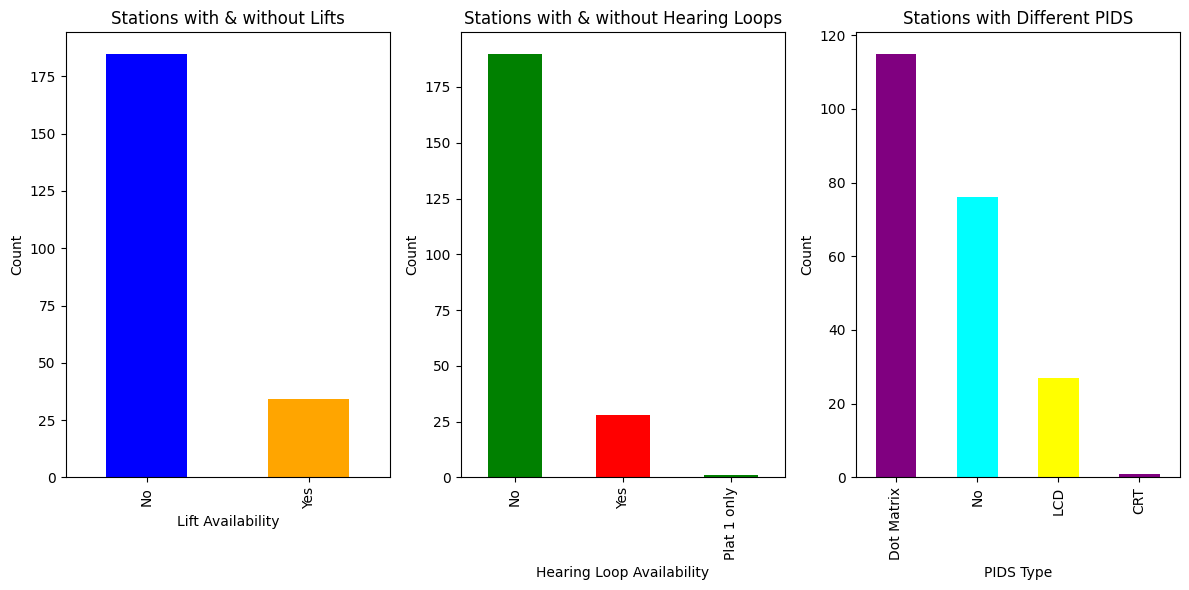

In [20]:
import matplotlib.pyplot as plt

# Counting stations with & without lifts
lift_counts = df_metro_cleaned["lift"].value_counts()
print("Count of stations with and without lifts:\n", lift_counts)

# Counting stations with & without hearing loops (he_loop)
he_loop_counts = df_metro_cleaned["he_loop"].value_counts()
print("\nCount of stations with and without hearing loops:\n", he_loop_counts)

# Counting stations with passenger information displays (pids)
pids_counts = df_metro_cleaned["pids"].value_counts()
print("\nCount of stations with different types of passenger information displays:\n", pids_counts)

# Bar chart for station accessibility features
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
lift_counts.plot(kind="bar", color=["blue", "orange"])
plt.title("Stations with & without Lifts")
plt.xlabel("Lift Availability")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
he_loop_counts.plot(kind="bar", color=["green", "red"])
plt.title("Stations with & without Hearing Loops")
plt.xlabel("Hearing Loop Availability")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
pids_counts.plot(kind="bar", color=["purple", "cyan", "yellow"])
plt.title("Stations with Different PIDS")
plt.xlabel("PIDS Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


**Results** 

**What We Did:**

1. Counted Stations with Lifts:

   We checked how many stations have lifts and how many don’t.

2. Counted Stations with Hearing Loops:

   We examined how many stations are equipped with hearing loops (used for assisting people with hearing impairments).

3. Counted Stations with Passenger Information Displays (PIDS):

   We counted the different types of passenger information display screens (e.g., dot matrix, LCD, or none).

4. Created a Bar Chart for Accessibility Features:

   We visualized these counts using three bar charts to make it easier to understand.

**What We Found:**

1. Most stations do not have lifts(185), but some do(34).

2. Similarly, only a few stations have hearing loops(28), while most do not(190) and 1 of the stations have it on 1 of their platforms.

3. The stations use different types of passenger information displays, with dot matrix being the most common(115).

**1.5 Exploratory Data Analysis**

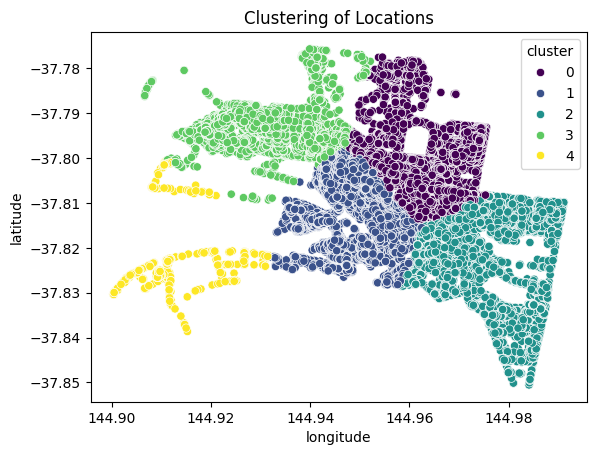

In [14]:
from sklearn.cluster import KMeans
import seaborn as sns
# Example: K-Means Clustering on geo-location (latitude, longitude)
X_clust = df_footpath_cleaned[['latitude', 'longitude']]

# Apply KMeans clustering (e.g., 5 clusters)
kmeans = KMeans(n_clusters=5)
df_footpath_cleaned['cluster'] = kmeans.fit_predict(X_clust)

# Visualize clusters
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df_footpath_cleaned, palette='viridis')
plt.title('Clustering of Locations')
plt.show()


**What We Did:**

The dataset (df_footpath_cleaned) contains footpath locations in the City of Melbourne.
It selects only latitude and longitude columns (X_clust) to perform clustering. Then we ran K-Means clustering with n_clusters=5, meaning it groups the locations into 5 distinct clusters based on their geographical coordinates. Then we used Seaborn's scatterplot to show the clustered locations.
Each color represents a different cluster, identified by the legend (cluster: 0 to 4).

**What We Found:**

The footpaths in the Melbourne CBD area are grouped based on their spatial proximity. Each color-coded cluster represents a group of footpaths that are closer to each other than to other clusters. Dense areas (purple, blue, teal clusters) likely represent heavily used pedestrian regions.
Yellow and green clusters indicate less densely populated footpath regions or suburban pathways.

Now we calculate accessibility score for the metro stations on the basis of whether they have the required features. For this, we assign a score based on the presence of lifts, hearing loops, and passenger information displays as our features.

For example:

Lift: 1 point for "yes", 0 points for "no"

Hearing Loop (he_loop): 1 point for "yes", 0 points for "no"

Passenger Information Display (pids): 1 point for having any of the values (e.g., dot matrix, lcd, etc.)

In [22]:
def calculate_accessibility_score(row):
    score = 0
    # Assigning points based on the availability of features
    score += 1 if row['lift'].lower() == 'yes' else 0
    score += 1 if row['he_loop'].lower() == 'yes' else 0
    score += 1 if row['pids'].strip().lower() not in ['no', 'none'] else 0  # Ensure different variations of "no" are checked
    return score

df_metro_cleaned['accessibility_score'] = df_metro_cleaned.apply(calculate_accessibility_score, axis=1)

# Displaying first 5 rows with the new accessibility score
print(df_metro_cleaned[['station', 'lift', 'he_loop', 'pids', 'accessibility_score']].head())


      station lift he_loop        pids  accessibility_score
0  Alphington   No      No  Dot Matrix                    1
1      Altona   No      No         LCD                    1
2      Anstey   No      No          No                    0
3      Auburn   No      No          No                    0
4      Batman   No      No          No                    0


In [23]:
# Sorting stations by accessibility score in descending order
df_metro_cleaned_sorted = df_metro_cleaned.sort_values(by='accessibility_score', ascending=False)

# Resetting the index after sorting for a clean output
df_metro_cleaned_sorted.reset_index(drop=True, inplace=True)

# Assigning a rank based on the sorted accessibility scores
df_metro_cleaned_sorted['accessibility_rank'] = df_metro_cleaned_sorted['accessibility_score'].rank(ascending=False, method='min')

# Displaying the top 10 stations based on accessibility score
print(df_metro_cleaned_sorted[['station', 'accessibility_score', 'accessibility_rank']].head(10))


             station  accessibility_score  accessibility_rank
0          Footscray                    3                 1.0
1           Coolaroo                    3                 1.0
2           Mckinnon                    3                 1.0
3          Bentleigh                    3                 1.0
4     West Footscray                    3                 1.0
5         Thomastown                    3                 1.0
6          Bayswater                    3                 1.0
7  Melbourne Central                    3                 1.0
8        Heatherdale                    3                 1.0
9             Epping                    3                 1.0


**Explanation:**

The sort_values() function sorts the dataset by accessibility_score in descending order to bring the stations with higher scores to the top.
The rank() function assigns ranks to the stations based on their accessibility score. We use ascending=False so that higher scores receive a higher rank, and method='min' to ensure that ties are given the same rank.
Finally, we display the top 10 stations based on the accessibility score along with their corresponding rank.
If the scores are the same, all stations will receive the same rank (e.g., rank 1.0).

**1.6 Geospatial Visualization & Analysis**

Now we just start with a basic visualization of footpath locations on a Melbourne Map using the Folium library.

In [35]:
import folium

# Visualizing footpath locations on a map (using latitude and longitude)
map_footpath = folium.Map(location=[-37.814, 144.96332], zoom_start=12)  # Melbourne coordinates

# Adding points from the footpath data
for _, row in df_footpath_cleaned.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(map_footpath)

# Displaying the map
map_footpath.save('footpath_map.html')

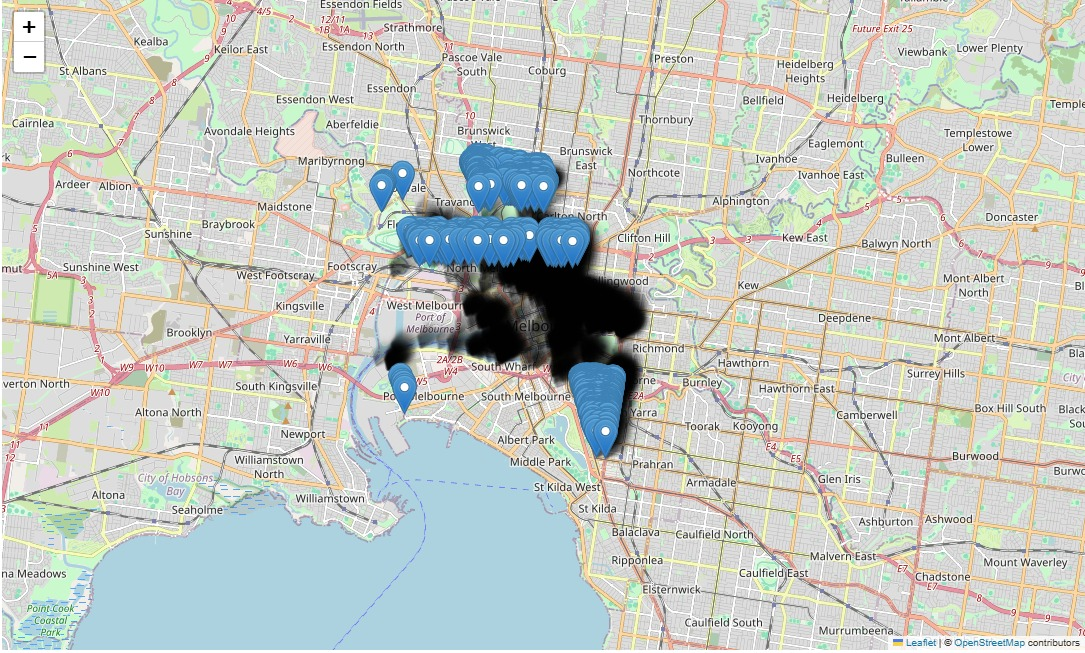

In [31]:
import geopandas as gpd
from shapely.geometry import Point
# If 'geo_point_2d' contains strings, split the string into latitude and longitude
df_metro_cleaned[['latitude', 'longitude']] = df_metro_cleaned['geo_point_2d'].str.split(',', expand=True)
df_metro_cleaned['latitude'] = pd.to_numeric(df_metro_cleaned['latitude'], errors='coerce')
df_metro_cleaned['longitude'] = pd.to_numeric(df_metro_cleaned['longitude'], errors='coerce')
# Creating geometry for GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(df_metro_cleaned['longitude'], df_metro_cleaned['latitude'])]
gdf_metro = gpd.GeoDataFrame(df_metro_cleaned, geometry=geometry)


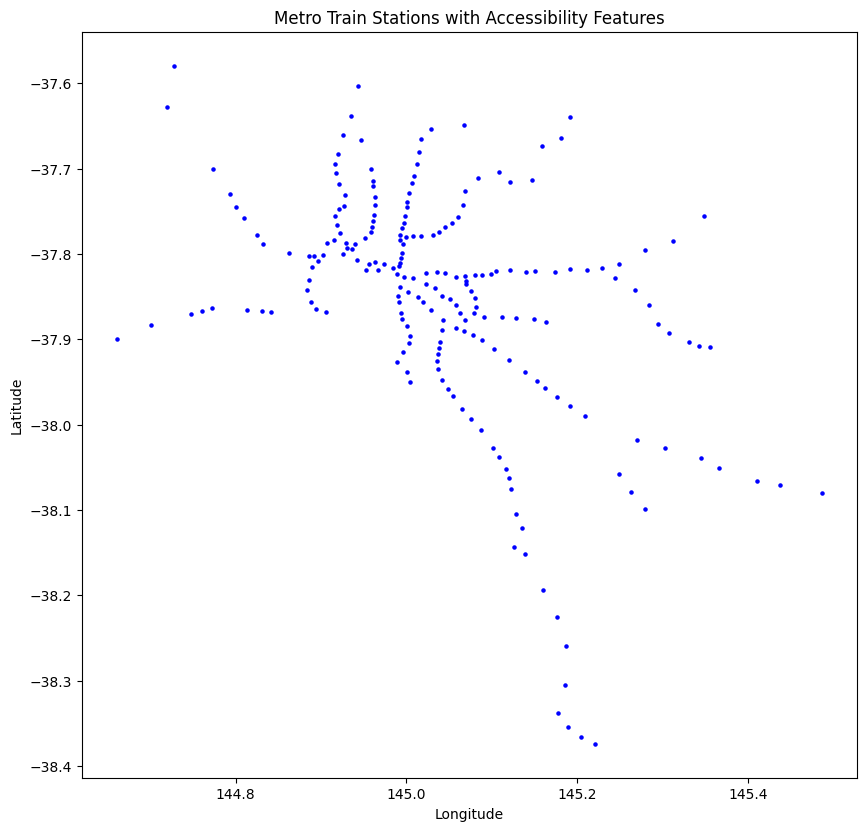

In [36]:
# Plotting the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf_metro.plot(ax=ax, marker='o', color='blue', markersize=5)

plt.title("Metro Train Stations with Accessibility Features")
plt.xlabel("Longitude")  # Label for x-axis
plt.ylabel("Latitude")   # Label for y-axis

plt.show()


From the above plot, we can see the dense concentration of points in the middle represents the Melbourne CBD and surrounding suburbs, where most train lines converge. The spokes extending outward correspond to different train lines, reaching the outer suburbs. This reflects the hub-and-spoke structure of Melbourne’s rail network.

Next we proceed to find the distance between the metro stations and their nearest accessible footpath. We will be using KDTree for fast nearest-neighbor search using indexes. Later we show the results in a tabular form

In [32]:
from scipy.spatial import cKDTree

# Converting lat/lon into NumPy arrays
footpath_coords = df_footpath_cleaned[['latitude', 'longitude']].to_numpy()
metro_coords = df_metro_cleaned[['latitude', 'longitude']].to_numpy()

# Building KDTree for fast nearest-neighbor search
tree = cKDTree(metro_coords)

# Finding the index of the nearest metro station for each footpath
distances, indices = tree.query(footpath_coords)

# Adding the results to the footpath dataframe
df_footpath_cleaned['nearest_metro_station'] = df_metro_cleaned.iloc[indices]['station'].values
df_footpath_cleaned['nearest_metro_distance'] = distances * 111139  # Convert degrees to meters

df_footpath_cleaned[['address', 'nearest_metro_station', 'nearest_metro_distance']].head()


,address,nearest_metro_station,nearest_metro_distance
3,Yarra River,South Kensington,659.565881
4,Yarra River,South Kensington,406.868720
6,Yarra River,Southern Cross,799.903034
7,Harbour Esplanade between La Trobe Street and ...,North Melbourne,848.505296
8,Harbour Esplanade between La Trobe Street and ...,North Melbourne,869.285962


Now that we have the distances, we can proceed with some further analyses.

We Identify Footpaths Near Metro Stations With High Steepness for which we set threshold of gradepc > 5 and filter out footpaths where nearest_metro_distance < 500m and have a steep grade.

In [33]:
# Define steep footpath threshold (e.g., >5% gradient)
steep_threshold = 5
nearby_threshold = 500  # meters

# Filter footpaths that are steep and close to metro stations
steep_near_metro = df_footpath_cleaned[
    (df_footpath_cleaned['gradepc'] > steep_threshold) & 
    (df_footpath_cleaned['nearest_metro_distance'] < nearby_threshold)
]

# Display results
steep_near_metro[['address', 'nearest_metro_station', 'nearest_metro_distance', 'gradepc']]


,address,nearest_metro_station,nearest_metro_distance,gradepc
99,Intersection of Albert Street and Morrison Place,Parliament,422.858906,7.86
106,Intersection of Wellington Parade South and Jo...,Jolimont,208.395940,5.46
119,Yarra River,West Richmond,344.332030,5.13
120,Yarra River,West Richmond,340.938232,5.13
190,Earl Street between Lygon Street and Cardigan ...,Melbourne Central,442.183174,7.34
...,...,...,...,...
33438,Maxwell Lane between Jolimont Road and Agnes S...,Jolimont,437.628622,7.31
33506,Yarra River,Melbourne Central,45.812208,16.54
33522,Cohen Place from Little Bourke Street,Parliament,461.655156,7.51
33524,Yarra River,Parliament,210.067477,5.10


**Observations**

1. Several footpaths exceed the 5% threshold
   
   Maxwell Lane (7.31%), Cohen Place (7.51%), Earl Street (7.34%)

   These may be difficult for wheelchair users and elderly people.
   
2. Extremely steep footpaths (Above 10%)
 
   Yarra River (16.54% near Melbourne Central)

   Yarra River (20.38% near Flinders Street)

   These are very steep and could require ramps, lifts, or alternative routes for accessibility.

3. Closest steep footpath (< 250m from a metro station)

   Yarra River (210m from Parliament, 5.10%)

   Yarra River (251m from Flinders Street, 20.38%)

   Intersection of Wellington Parade South (208m from Jolimont, 5.46%)

   These are very close to metro stations, meaning they directly impact commuters with mobility impairments.


Let's add the co-ordinates and integrate footpath and metro stations into the map

In [30]:
import folium

m = folium.Map(location=[-37.81, 144.96], zoom_start=12)

# Adding metro stations using latitude and longitude co-ordinates
for idx, row in df_metro_cleaned.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['station'],
        icon=folium.Icon(color='blue', icon='train', prefix='fa')
    ).add_to(m)

# Adding steep footpaths near metro stations using latitude and longitude co-ordinates
for idx, row in steep_near_metro.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Steep Footpath: {row['gradepc']}% | Nearest Metro: {row['nearest_metro_station']}",
        icon=folium.Icon(color='red', icon='exclamation-triangle', prefix='fa')
    ).add_to(m)

# Save and display the map
m.save("footpath_metro_map.html")
m


**Insights** 

As discussed from the above observations there are quite a factors which affect the people with impairments who require accessibility needs on daily basis for their travel. Below are some insights we have gathered till now:

**Who is Affected?**

Wheelchair users: Difficulty maneuvering due to incline. Risk of rolling/sliding for wheelchairs. Difficult to stop/control movement on steep slopes.

Elderly people: Higher risk of falls.

People with mobility impairments: Need ramps or alternative routes.

Parents with strollers: Struggles pushing uphill/downhill.

If metro stations have steep footpaths nearby, it reduces accessibility for people with disabilities.

**What Can Be Done?**

Ramps & handrails at steep footpaths.

Alternative routes for people with disabilities.

Public transport hubs should have low-grade footpaths for easy access.
